<a href="https://colab.research.google.com/github/tapiwamesa/MTN-Nigeria-customer-churn-prediction-model/blob/main/MTN_Nigeria_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Customer retention is a critical aspect of business sustainability and growth. Companies across industries face significant financial impact when customers discontinue their services—commonly referred to as **customer churn**. Identifying customers who are likely to churn in advance can empower businesses to take proactive measures to improve customer satisfaction, tailor engagement strategies and reduce churn rates.

This project aims to develop a **predictive machine learning model** that accurately identifies customers who are at high risk of churning based on their historical behavior, usage patterns, demographic information, and engagement with the service. The objective is to enable data-driven decision-making for customer retention strategies and improve long-term customer value.

# **Objectives**


1. **To analyze and preprocess customer data** to extract relevant features that influence churn behavior, such as usage patterns, transaction history, demographics and customer service interactions.

2. **To build and evaluate machine learning models** capable of predicting whether a customer is likely to churn, using classification algorithms such as logistic regression, decision trees and random forest.

3. **To compare model performance** using metrics such as accuracy, precision, recall, F1-score and select the most effective model for deployment.

4. **To create a scalable and deployable solution** that can be integrated into existing business systems for real-time churn prediction and customer relationship management.


# **Exploratory Data Analysis**

In [1]:
# importing necessary libraries for EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# mounting the drive

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# loading the data

mtn = pd.read_csv("/content/drive/MyDrive/Datasets/mtn_customer_churn.csv")
mtn.head()

,Customer ID,Full Name,Date of Purchase,Age,State,MTN Device,Gender,Satisfaction Rate,Customer Review,Customer Tenure in months,Subscription Plan,Unit Price,Number of Times Purchased,Total Revenue,Data Usage,Customer Churn Status,Reasons for Churn
0,CUST0001,Ngozi Berry,Jan-25,27,Kwara,4G Router,Male,2,Fair,2,165GB Monthly Plan,35000,19,665000,44.48,Yes,Relocation
1,CUST0002,Zainab Baker,Mar-25,16,Abuja (FCT),Mobile SIM Card,Female,2,Fair,22,12.5GB Monthly Plan,5500,12,66000,19.79,Yes,Better Offers from Competitors
2,CUST0003,Saidu Evans,Mar-25,21,Sokoto,5G Broadband Router,Male,1,Poor,60,150GB FUP Monthly Unlimited,20000,8,160000,9.64,No,NaN
3,CUST0003,Saidu Evans,Mar-25,21,Sokoto,Mobile SIM Card,Male,1,Poor,60,1GB+1.5mins Daily Plan,500,8,4000,197.05,No,NaN
4,CUST0003,Saidu Evans,Mar-25,21,Sokoto,Broadband MiFi,Male,1,Poor,60,30GB Monthly Broadband Plan,9000,15,135000,76.34,No,NaN


In [4]:
# Column data types
mtn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer ID                974 non-null    object 
 1   Full Name                  974 non-null    object 
 2   Date of Purchase           974 non-null    object 
 3   Age                        974 non-null    int64  
 4   State                      974 non-null    object 
 5   MTN Device                 974 non-null    object 
 6   Gender                     974 non-null    object 
 7   Satisfaction Rate          974 non-null    int64  
 8   Customer Review            974 non-null    object 
 9   Customer Tenure in months  974 non-null    int64  
 10  Subscription Plan          974 non-null    object 
 11  Unit Price                 974 non-null    int64  
 12  Number of Times Purchased  974 non-null    int64  
 13  Total Revenue              974 non-null    int64  

There are 974 entries in the mtn data with a total of 17 columns where 1 is of type float, 6 are integers and 10 are of data type object. Object data type columns are those columns that have strings and/or numeric eg Subscription Plan, Customer ID, Full name etc




In [5]:
# Data basic statistics

mtn.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,974.0,48.043121,17.764307,16.00,32.0000,49.00,63.7500,80.0
Satisfaction Rate,974.0,2.947639,1.384219,1.00,2.0000,3.00,4.0000,5.0
Customer Tenure in months,974.0,31.422998,17.191256,1.00,17.0000,31.00,47.0000,60.0
Unit Price,974.0,19196.663244,25586.726985,350.00,5500.0000,14500.00,24000.0000,150000.0
Number of Times Purchased,974.0,10.564682,5.709427,1.00,5.0000,11.00,15.0000,20.0
Total Revenue,974.0,204669.609856,324785.499316,350.00,33000.0000,108000.00,261000.0000,3000000.0
Data Usage,974.0,99.304764,57.739511,0.82,47.6375,103.33,149.6975,200.0


From the info method, there are 7 numeric columns and above are shows with the respective basic statistics.

- The average age of customers as of the period Q1 2025 with the oldest customer(s) being 80 years old and the youngest customer is 16 years old. The 75th percentile tells us that 75% of three quarters of the customers are below the age of 63 years and only 25% of the customers are older than 62 years. The standard deviation looks at how much the age of customers vary from the average age, and this tells us that there is significant variation in the ages where some customers are much younger and some are much older.

- The maximum satisfaction rating is 5, and only 25% of the customers rated the business service above a rating of 4. The average ratings in Q1 2025 is 2.9.

- The youngest customer in Q1 2025 is 1 month old, which means the customer(s) were onboarded in in the same period. The oldest customer in the system is 60 months old, which 5 years with mtn.

- The average unit price of the packages purchased by the subscribers is 19,196.66 naira with the most valuable packed at 150,000 naira. On average the subscribers purchase data 10.5 times in a month generating an average of 204,669.60 naira for the company. This is driven by the upside data usage rates of 99 gigabytes per customer in the period of Q1 2025.

In [6]:

mtn[["State", "Total Revenue"]].groupby("State").sum().sort_values("Total Revenue", ascending = False).head()

,Total Revenue
State,
Plateau,9463600
Ekiti,9240250
Yobe,8881700
Oyo,8600350
Edo,7937650


## **a. Key Metrics Data Viz**

In [7]:
# Slicing the dataframe for plots

# Total revenue
rev_states = mtn[["State", "Total Revenue"]].groupby("State").sum().sort_values("Total Revenue", ascending = True).tail()

# Device usage
dev_counts = mtn["MTN Device"].value_counts().sort_values()

#  Gender Statistics
gender_stats = mtn["Gender"].value_counts().sort_values()

# Customer Churn Statistics
ccs = mtn["Customer Churn Status"].value_counts().sort_values()

# Customer Review
customer_reviews = mtn["Customer Review"].value_counts().sort_values()

# Reasons for customer leaving
churn_reasons = mtn["Reasons for Churn"].value_counts().sort_values()

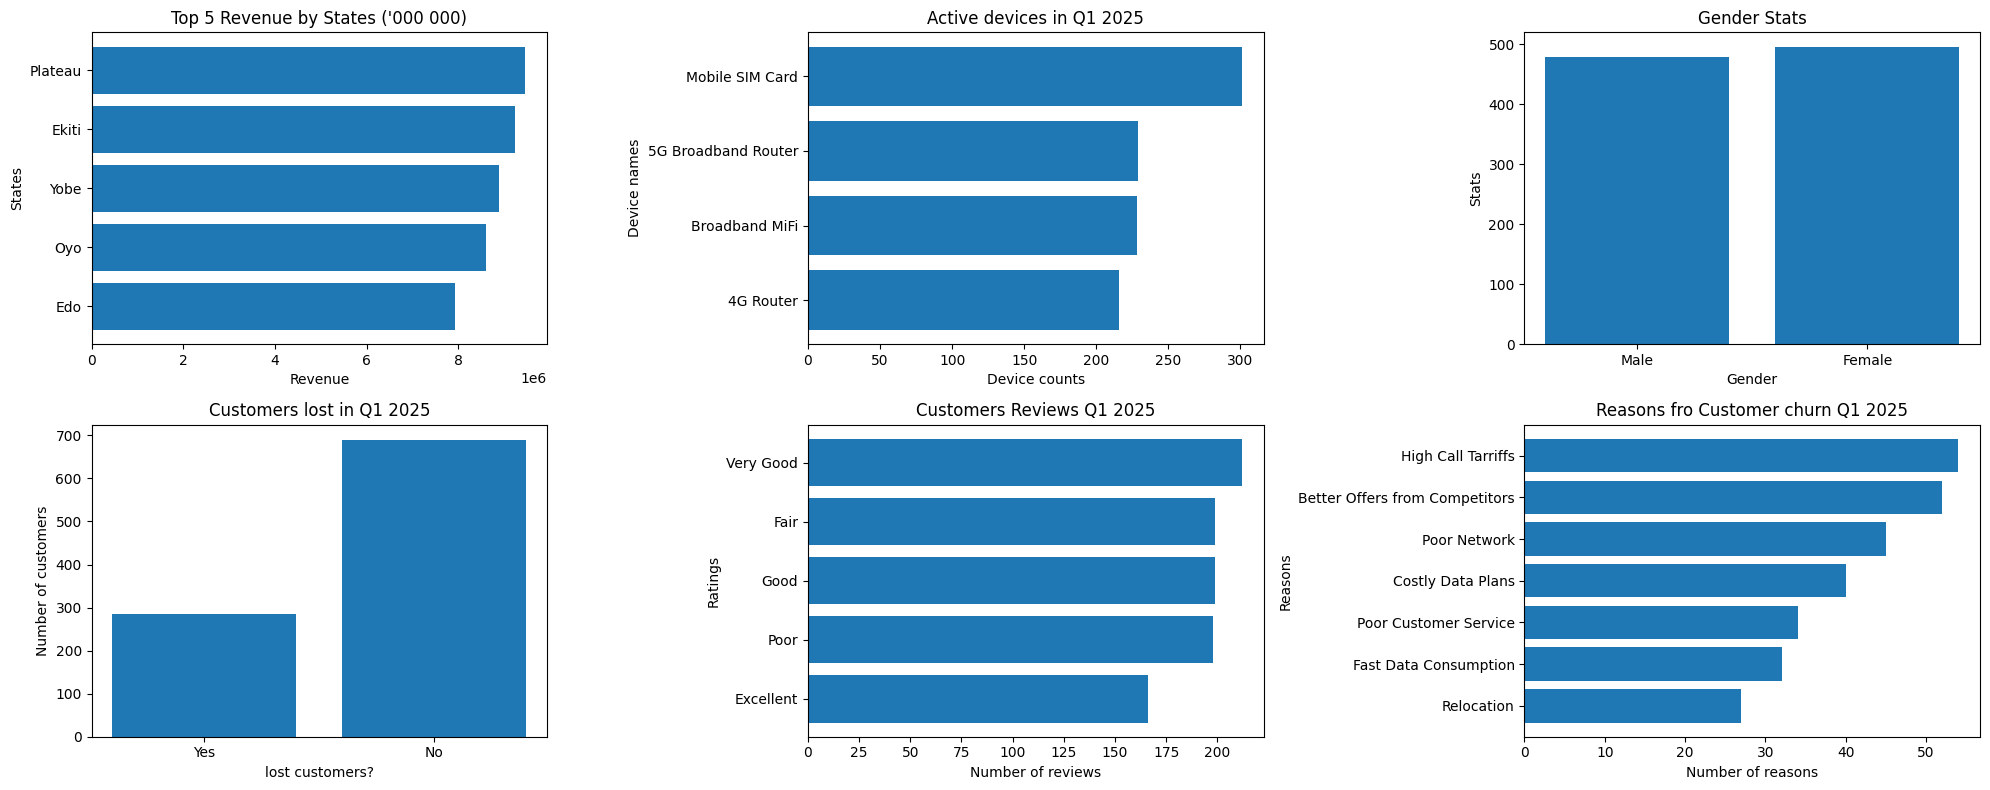

In [8]:

# setting the subplots 2 x 2 grid
fig, axes = plt.subplots(2 ,3, figsize = (20, 8))

# Plotting Revenue by states
axes[0 ,0].barh(rev_states.index, rev_states["Total Revenue"])
axes[0, 0].set_title("Top 5 Revenue by States ('000 000)")
axes[0, 0].set_xlabel("Revenue")
axes[0, 0].set_ylabel("States")

# Plotting the number of devices active in Q1 2025
axes[0, 1].barh(dev_counts.index, dev_counts.values)
axes[0 ,1].set_title("Active devices in Q1 2025")
axes[0 ,1].set_xlabel("Device counts")
axes[0 ,1].set_ylabel("Device names")

# Plotting the gender stats
axes[0 ,2].bar(gender_stats.index, gender_stats.values)
axes[0 ,2].set_title("Gender Stats")
axes[0 ,2].set_xlabel("Gender")
axes[0 ,2].set_ylabel("Stats")

# Plotting customer churn
axes[1, 0].bar(ccs.index, ccs.values)
axes[1 ,0].set_title("Customers lost in Q1 2025")
axes[1 ,0].set_xlabel("lost customers?")
axes[1 ,0].set_ylabel("Number of customers")

# Plotting customer reviews
axes[1, 1].barh(customer_reviews.index, customer_reviews.values)
axes[1 ,1].set_title("Customers Reviews Q1 2025")
axes[1 ,1].set_xlabel("Number of reviews")
axes[1 ,1].set_ylabel("Ratings")

# Plotting reasons for customer churn
axes[1, 2].barh(churn_reasons.index, churn_reasons.values)
axes[1 ,2].set_title("Reasons fro Customer churn Q1 2025")
axes[1 ,2].set_xlabel("Number of reasons")
axes[1 ,2].set_ylabel("Reasons")

plt.tight_layout()
plt.show()

- Plateau raked in the most Revenue in Q1 2025 with 9,463,600 followed by Ekiti state with 9,240,250. The top 5 revenue generators contributed 8% of the total revenue translating to 15,897,000 out of a total of 199,348,200 generated in Q1 2025.

- Mobile SIM Card is the most subscribed service with 301 subscribers in the first quarter of 2025, 4G router have the least subscriptions with 216 subscribers. All the services except for Mobile SIM Card as well above 200 subscribers in the quarter.

- Female subscribers make up 51% of the customers and 49% is made of the male gender.

## b. **Revenue Analysis**

In [9]:
# Top 5 States by Revenue
top5 = mtn[["State", "Total Revenue"]].groupby("State").sum().sort_values("Total Revenue", ascending = True).head()
top5

,Total Revenue
State,
Lagos,2824500
Ondo,2934400
Nasarawa,3361750
Adamawa,3374000
Akwa Ibom,3402350


In [10]:
# Revenue generated by top 5 states
top5.values.sum()

np.int64(15897000)

In [11]:
# total revenue generated

mtn["Total Revenue"].sum()

np.int64(199348200)

In [12]:
# % of top 5 Revenue generators to total revenue in Q1 2025

top5.values.sum()/mtn["Total Revenue"].sum()*100

np.float64(7.974488859192107)

In [13]:
# Top 5 states with high Revenue

rev_states = mtn[["Total Revenue", "State"]].groupby("State").sum()
rev_states = rev_states.sort_values("Total Revenue", ascending = True).head(5)
rev_states

,Total Revenue
State,
Lagos,2824500
Ondo,2934400
Nasarawa,3361750
Adamawa,3374000
Akwa Ibom,3402350


In [14]:
# Top 5 Revenue Generating States breakdown by Device

state_dev_rev = mtn[["Total Revenue", "State", "MTN Device"]].groupby(["State", "MTN Device"]).sum()
state_dev_rev5 = state_dev_rev.loc[["Lagos", "Ondo", "Nasarawa", "Adamawa", "Akwa Ibom"]]
state_dev_rev5

Total Revenue
State     MTN Device                        
Lagos     4G Router                   317000
          5G Broadband Router        1847500
          Broadband MiFi              465000
          Mobile SIM Card             195000
Ondo      4G Router                   570000
          5G Broadband Router        1850000
          Broadband MiFi              443000
          Mobile SIM Card              71400
Nasarawa  4G Router                   565000
          5G Broadband Router         665000
          Broadband MiFi             1152000
          Mobile SIM Card             979750
Adamawa   4G Router                   700000
          5G Broadband Router        1203000
          Broadband MiFi             1212500
          Mobile SIM Card             258500
Akwa Ibom 4G Router                   947000
          5G Broadband Router         198000
          Broadband MiFi             1793000
          Mobile SIM Card             464350

In [15]:
# Moving the MTN Device index elements into columns using unstack method

unst = state_dev_rev5.unstack()
unst

Total Revenue                                                   
MTN Device     4G Router 5G Broadband Router Broadband MiFi Mobile SIM Card
State                                                                      
Lagos             317000             1847500         465000          195000
Ondo              570000             1850000         443000           71400
Nasarawa          565000              665000        1152000          979750
Adamawa           700000             1203000        1212500          258500
Akwa Ibom         947000              198000        1793000          464350

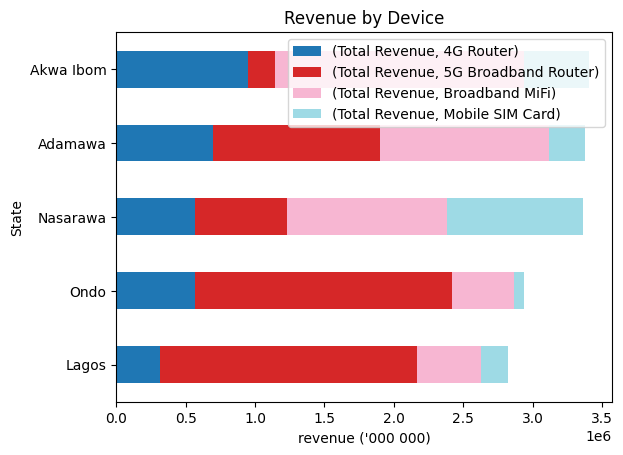

In [16]:
# Revenue stacked plot

unst.plot(kind = "barh", stacked = True, colormap = "tab20")
plt.legend(loc = "upper right")
plt.title("Revenue by Device")
plt.xlabel("revenue ('000 000)")
plt.show()

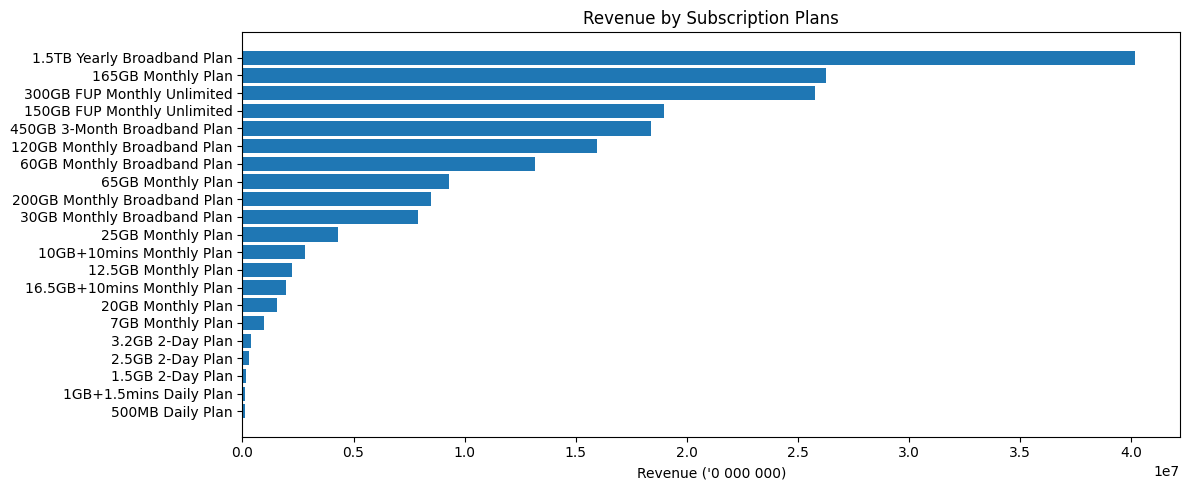

In [17]:
# Slicing mtn dataframe for subscription plans revenue for Q1 2055
plans = mtn[["Subscription Plan", "Total Revenue"]].groupby("Subscription Plan").sum().sort_values("Total Revenue", ascending = True)

# Plotting the revenue generation by subscription plan
plt.figure(figsize = (12, 5))
plt.barh(plans.index.to_list(), plans["Total Revenue"])
plt.title("Revenue by Subscription Plans")
plt.xlabel("Revenue ('0 000 000)")
plt.tight_layout()
plt.show()

## **c. Churn Analysis**

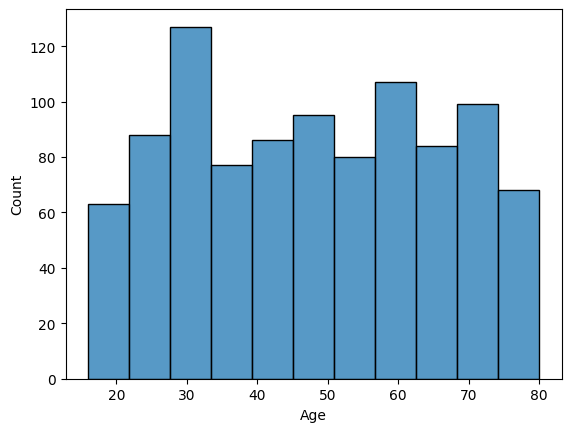

In [18]:
# Distribution of Age of the customers

sns.histplot(mtn["Age"])
plt.show()

In [19]:
# Lost customers by Gender

mtn[["Gender", "Customer Churn Status"]].value_counts().groupby(["Gender", "Customer Churn Status"]).sum()

Gender  Customer Churn Status
Female  No                       345
        Yes                      150
Male    No                       345
        Yes                      134
Name: count, dtype: int64

The company lost more female customers in Q1 2025 than males, having retained 345 from both genders 150 females left the company whilst 134 males left.

In [20]:
# Breakdown of lost customers by gender
lost = mtn[["Gender","Reasons for Churn"]].value_counts().groupby(["Gender","Reasons for Churn"]).sum()
lost

Gender  Reasons for Churn             
Female  Better Offers from Competitors    22
        Costly Data Plans                 16
        Fast Data Consumption             16
        High Call Tarriffs                32
        Poor Customer Service             24
        Poor Network                      28
        Relocation                        12
Male    Better Offers from Competitors    30
        Costly Data Plans                 24
        Fast Data Consumption             16
        High Call Tarriffs                22
        Poor Customer Service             10
        Poor Network                      17
        Relocation                        15
Name: count, dtype: int64

High call tarrifs was the biggest driver for females leaving the company followed by  Poor Network connections. A few females customers left due to relocation. Better Offers from cmpetitors and Costly Data Plans drove more males away from using MTN network.

The histplot above shows the age distribution amongst the MTN Nigeria customers in Q1 2025 with an outstanding composition of the young people in the 25 to 35 age group dominating.

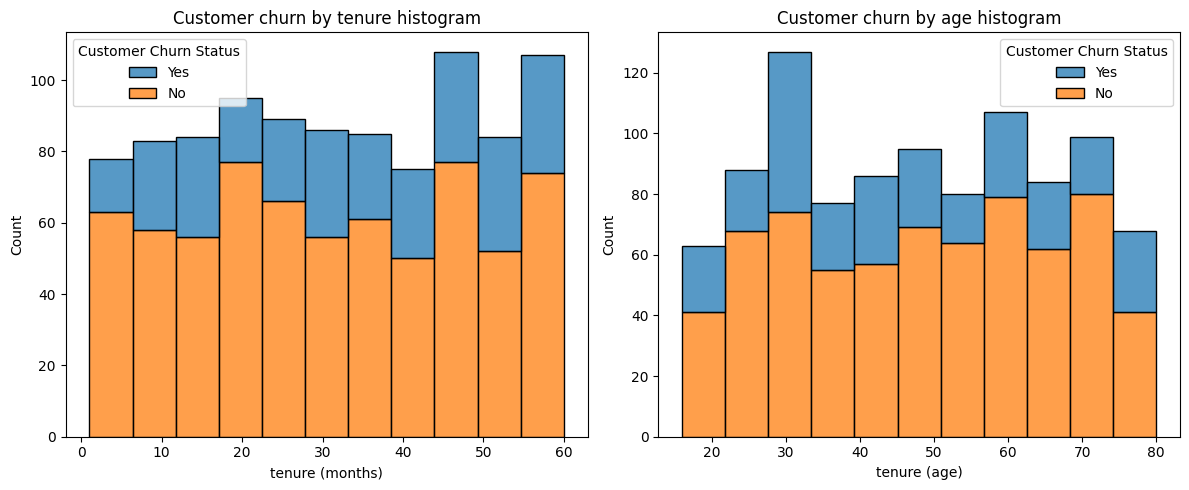

In [21]:
# Customer Churn Analysis

# Customer churn vs tenure
tenure = mtn[["Customer Tenure in months", "Customer Churn Status"]] # Slicing the to remain with just the months

# Customer tenure vs age
tenure_age = mtn[["Age", "Customer Churn Status"]] # Slicing the to remain with just the months

# configuring two plots
fig, axes = plt.subplots(1, 2, figsize = (12, 5))

# Plotting the tenure histogram
sns.histplot(tenure, x = "Customer Tenure in months", hue = "Customer Churn Status", ax = axes[0], multiple = "stack")
axes[0].set_title("Customer churn by tenure histogram")
axes[0].set_xlabel("tenure (months)")

# Plotting the tenure by age histogram
sns.histplot(tenure_age, x = "Age", hue = "Customer Churn Status",  ax = axes[1], multiple = "stack")
axes[1].set_title("Customer churn by age histogram")
axes[1].set_xlabel("tenure (age)")


plt.tight_layout()
plt.show()

In [22]:
# Churn statistics for customers older than 40 months with the company

ten_churn = mtn[["Customer Tenure in months", "Reasons for Churn"]]
ten_churn = ten_churn[ten_churn["Customer Tenure in months"] >= 40]
ten_churn["Reasons for Churn"].value_counts()

,count
Reasons for Churn,
High Call Tarriffs,34
Fast Data Consumption,18
Better Offers from Competitors,17
Poor Customer Service,13
Poor Network,12
Costly Data Plans,12
Relocation,6


The histogram plot shows that MTN Nigeria lost more customers that had been in business with the network provider for over 40 months than they did with relatively new customers (less than a year customers). Most of the reasons cited for leaving is the High Call Tarrifs with 34 complaints from the lost customers. Reasons more inclined to affordability were cited than any other reason, these are reasons related to Fast Data Consumption, Better odder from competitors. Only 6 customers left the company due to relocation.

From the histogram plots the millenials age group lost more customers than any other age range. This surely can be attributed to the tech saviness and high elasticity to service charges as is evidenced by the reason to leave. The tech saviness of millenials allows them to explore competitor services with so much ease and adaptability such that when their needs and expectations are met they are quick to leave their current service providers for alternatives.

# **Model Bulding**

## **Preprocessing**

In [23]:
# Lets start with cleaning the data

data = mtn.copy()
data.drop(columns = ["Customer ID", "Full Name", "Date of Purchase", "Reasons for Churn"], inplace = True)
data.head()

,Age,State,MTN Device,Gender,Satisfaction Rate,Customer Review,Customer Tenure in months,Subscription Plan,Unit Price,Number of Times Purchased,Total Revenue,Data Usage,Customer Churn Status
0,27,Kwara,4G Router,Male,2,Fair,2,165GB Monthly Plan,35000,19,665000,44.48,Yes
1,16,Abuja (FCT),Mobile SIM Card,Female,2,Fair,22,12.5GB Monthly Plan,5500,12,66000,19.79,Yes
2,21,Sokoto,5G Broadband Router,Male,1,Poor,60,150GB FUP Monthly Unlimited,20000,8,160000,9.64,No
3,21,Sokoto,Mobile SIM Card,Male,1,Poor,60,1GB+1.5mins Daily Plan,500,8,4000,197.05,No
4,21,Sokoto,Broadband MiFi,Male,1,Poor,60,30GB Monthly Broadband Plan,9000,15,135000,76.34,No


In [24]:
# creating a copy for our baseline model
mtn_data = data.copy()

In [25]:
# Manuaaly encoding the Churn Status column and Gender column

status = {"Yes":1, "No": 0}
mtn_data["Churn"] = mtn_data["Customer Churn Status"].map(status)

gender = {"Male":0, "Female":1}
mtn_data["Customer Gender"] = mtn_data["Gender"].map(gender)

mtn_data.head()

,Age,State,MTN Device,Gender,Satisfaction Rate,Customer Review,Customer Tenure in months,Subscription Plan,Unit Price,Number of Times Purchased,Total Revenue,Data Usage,Customer Churn Status,Churn,Customer Gender
0,27,Kwara,4G Router,Male,2,Fair,2,165GB Monthly Plan,35000,19,665000,44.48,Yes,1,0
1,16,Abuja (FCT),Mobile SIM Card,Female,2,Fair,22,12.5GB Monthly Plan,5500,12,66000,19.79,Yes,1,1
2,21,Sokoto,5G Broadband Router,Male,1,Poor,60,150GB FUP Monthly Unlimited,20000,8,160000,9.64,No,0,0
3,21,Sokoto,Mobile SIM Card,Male,1,Poor,60,1GB+1.5mins Daily Plan,500,8,4000,197.05,No,0,0
4,21,Sokoto,Broadband MiFi,Male,1,Poor,60,30GB Monthly Broadband Plan,9000,15,135000,76.34,No,0,0


In [26]:
# Manually encoding columns that have ordinal data - Customer Review
encoded_reviews = {}
unique_reviews = mtn_data["Customer Review"].unique()

for i in range(1, len(unique_reviews)+1):
    encoded_reviews[unique_reviews[i-1]] = i

# Mapping the nominal values of the review
mtn_data["Reviews"] = mtn_data["Customer Review"].map(encoded_reviews)

In [27]:
mtn_data.head()

,Age,State,MTN Device,Gender,Satisfaction Rate,Customer Review,Customer Tenure in months,Subscription Plan,Unit Price,Number of Times Purchased,Total Revenue,Data Usage,Customer Churn Status,Churn,Customer Gender,Reviews
0,27,Kwara,4G Router,Male,2,Fair,2,165GB Monthly Plan,35000,19,665000,44.48,Yes,1,0,1
1,16,Abuja (FCT),Mobile SIM Card,Female,2,Fair,22,12.5GB Monthly Plan,5500,12,66000,19.79,Yes,1,1,1
2,21,Sokoto,5G Broadband Router,Male,1,Poor,60,150GB FUP Monthly Unlimited,20000,8,160000,9.64,No,0,0,2
3,21,Sokoto,Mobile SIM Card,Male,1,Poor,60,1GB+1.5mins Daily Plan,500,8,4000,197.05,No,0,0,2
4,21,Sokoto,Broadband MiFi,Male,1,Poor,60,30GB Monthly Broadband Plan,9000,15,135000,76.34,No,0,0,2


In [28]:
# Encoding the nominal columns and getting rid of multicolinearity using the drop_first = True argument

mtn_data2 = pd.get_dummies(mtn_data, columns = ["State", "MTN Device", "Subscription Plan"], drop_first = True, dtype = int)
mtn_data2.head()

,Age,Gender,Satisfaction Rate,Customer Review,Customer Tenure in months,Unit Price,Number of Times Purchased,Total Revenue,Data Usage,Customer Churn Status,...,Subscription Plan_20GB Monthly Plan,Subscription Plan_25GB Monthly Plan,Subscription Plan_3.2GB 2-Day Plan,Subscription Plan_300GB FUP Monthly Unlimited,Subscription Plan_30GB Monthly Broadband Plan,Subscription Plan_450GB 3-Month Broadband Plan,Subscription Plan_500MB Daily Plan,Subscription Plan_60GB Monthly Broadband Plan,Subscription Plan_65GB Monthly Plan,Subscription Plan_7GB Monthly Plan
0,27,Male,2,Fair,2,35000,19,665000,44.48,Yes,...,0,0,0,0,0,0,0,0,0,0
1,16,Female,2,Fair,22,5500,12,66000,19.79,Yes,...,0,0,0,0,0,0,0,0,0,0
2,21,Male,1,Poor,60,20000,8,160000,9.64,No,...,0,0,0,0,0,0,0,0,0,0
3,21,Male,1,Poor,60,500,8,4000,197.05,No,...,0,0,0,0,0,0,0,0,0,0
4,21,Male,1,Poor,60,9000,15,135000,76.34,No,...,0,0,0,0,1,0,0,0,0,0


In [29]:
# Identifying columns of data type object to drop

columns_to_drop = []

for i in mtn_data2.columns:
    if mtn_data2[i].dtype == 'O':   # 'O' is Object type
        columns_to_drop.append(i)
columns_to_drop

['Gender', 'Customer Review', 'Customer Churn Status']

In [30]:
# Dropping Object columns

mtn_2025 = mtn_data2.drop(columns = columns_to_drop)
mtn_2025.head()

,Age,Satisfaction Rate,Customer Tenure in months,Unit Price,Number of Times Purchased,Total Revenue,Data Usage,Churn,Customer Gender,Reviews,...,Subscription Plan_20GB Monthly Plan,Subscription Plan_25GB Monthly Plan,Subscription Plan_3.2GB 2-Day Plan,Subscription Plan_300GB FUP Monthly Unlimited,Subscription Plan_30GB Monthly Broadband Plan,Subscription Plan_450GB 3-Month Broadband Plan,Subscription Plan_500MB Daily Plan,Subscription Plan_60GB Monthly Broadband Plan,Subscription Plan_65GB Monthly Plan,Subscription Plan_7GB Monthly Plan
0,27,2,2,35000,19,665000,44.48,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,16,2,22,5500,12,66000,19.79,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,21,1,60,20000,8,160000,9.64,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,21,1,60,500,8,4000,197.05,0,0,2,...,0,0,0,0,0,0,0,0,0,0
4,21,1,60,9000,15,135000,76.34,0,0,2,...,0,0,0,0,1,0,0,0,0,0


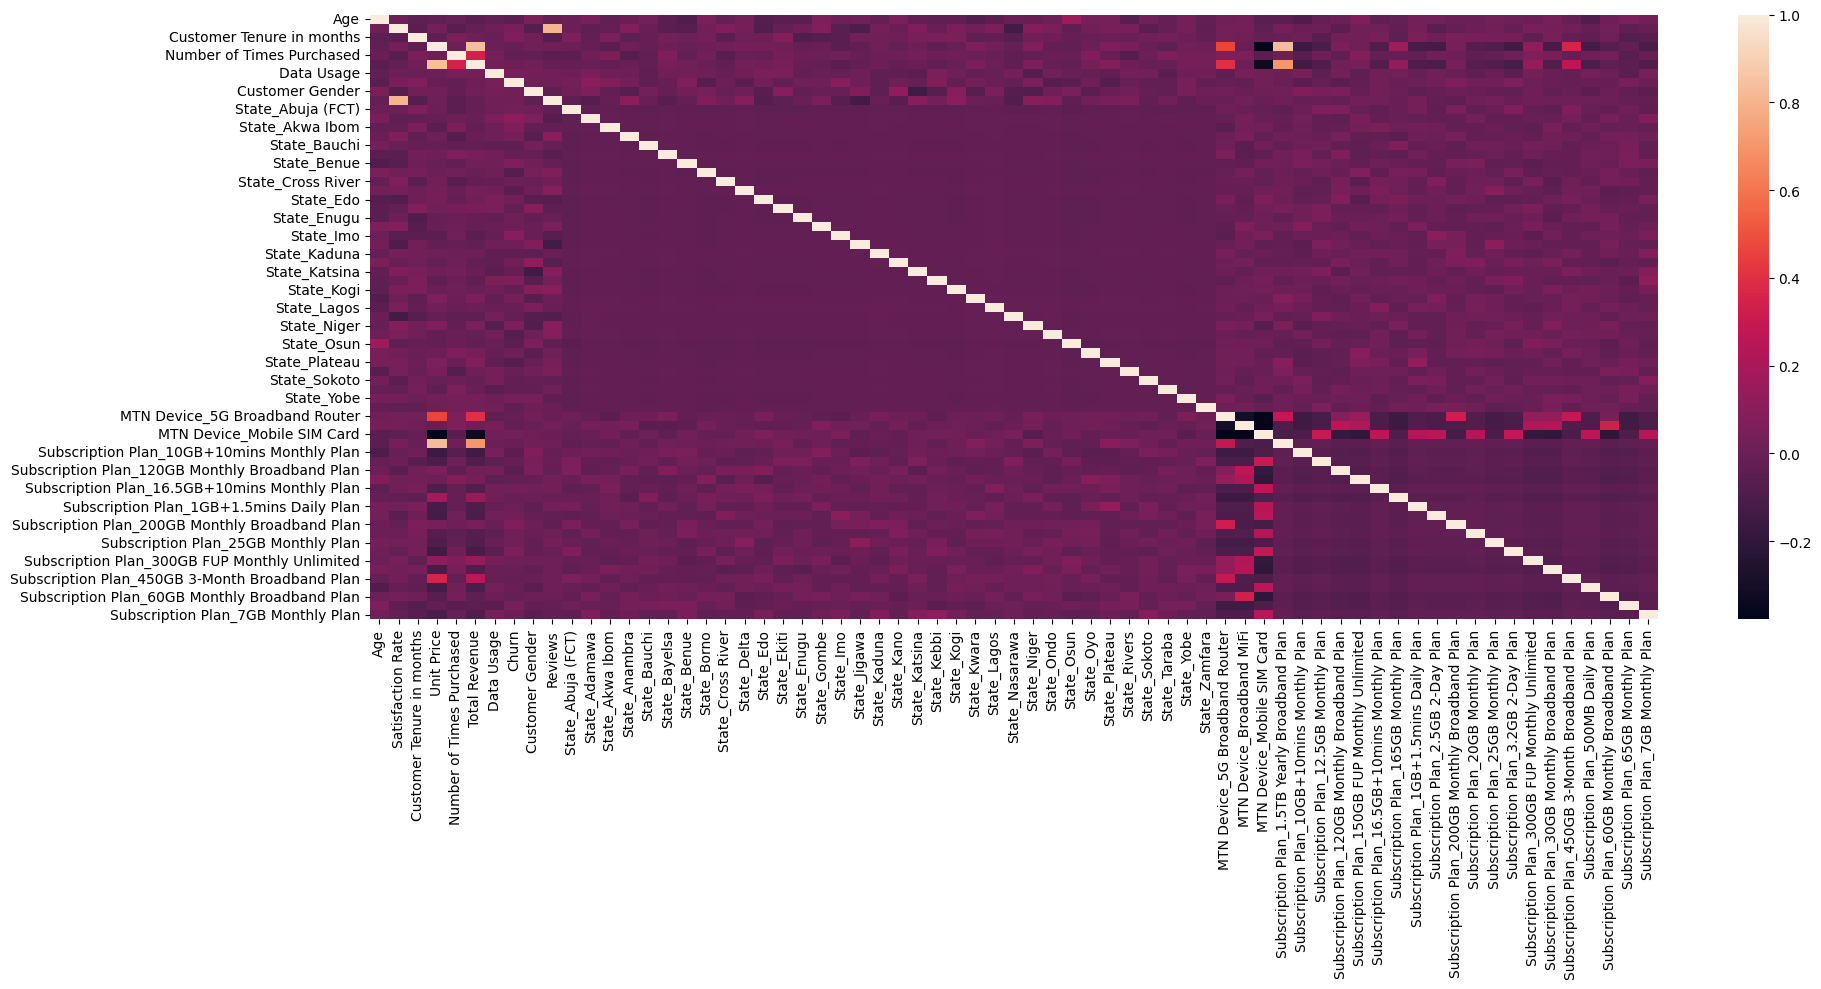

In [31]:
# Correlation Matrix

fig, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(mtn_2025.corr(), ax = ax)
plt.tight_layout()
plt.show()

In [32]:
# Importing dependencies for ML models

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [42]:
# Checking class imbalance
mtn_2025["Churn"].value_counts(normalize = True)

,proportion
Churn,
0,0.708419
1,0.291581


There is moderate class im alance where 71% of the class of zero resemble a no customer lost and class resemble a scenario where a customer was lost

In [46]:
# Splitting data into target, features and train and split sets

# fetures and target sets
X = mtn_2025.drop(columns = "Churn")
y = mtn_2025["Churn"]

# train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify =y, random_state = 42)

In [44]:
# looking at data shape before splitting

X.shape, y.shape

((974, 66), (974,))

In [47]:
# Data shape for train set

X_train.shape, y_train.shape

((681, 66), (681,))

In [48]:
# Data shape for tets set

X_test.shape, y_test.shape

((293, 66), (293,))

In [49]:
# Scaling the data sets

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 1. Logistic Regression

In [51]:
# instantiating the logistics Regression model

results = pd.DataFrame(columns = ["Accuracy", "Precision", "Recall", "F1"])

lg = LogisticRegression()
lg.fit(X_train_scaled, y_train)
y_pred = lg.predict(X_test_scaled)
Accuracy = accuracy_score(y_test, y_pred)
Precision = precision_score(y_test, y_pred)
Recall = recall_score(y_test, y_pred)
F1 = f1_score(y_test, y_pred)

# appending the results table
results.loc[len(results)] = [Accuracy, Precision, Recall, F1]

results

,Accuracy,Precision,Recall,F1
0,0.662116,0.294118,0.117647,0.168067


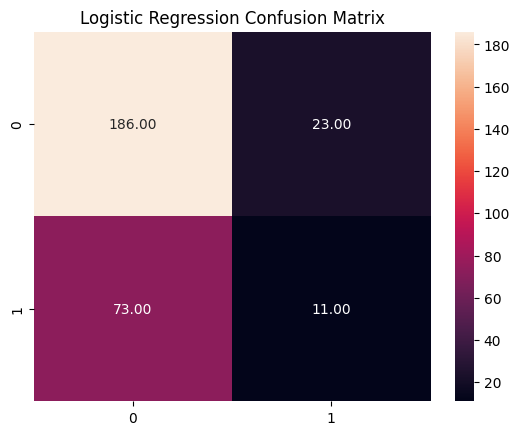

In [108]:
# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = "0.2f")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

From the metrics the model performs better on the train data, when it comes to predicing on unseen data the model is not oredicting well and is failing to generalize on unseen data. This is a sign of underfitting, the model i snot learning enough relationships on the train data thus its simplifying the underlying relationships in the features.

## 1.1 Logistic Regression (with SMOTE - Synthentic MInority Oversampling Technique)

In [112]:
# importing SMOTE module and resampling

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)
X_train_smoted, y_train_smoted = smote.fit_resample(X_train_scaled, y_train)


In [114]:
# unsampled data
X_train_scaled.shape, y_train.shape

((681, 66), (681,))

In [113]:
# resampled data
X_train_smoted.shape, y_train_smoted.shape

((962, 66), (962,))

In [117]:
# instantiating the model, training and predicting

results_sm = pd.DataFrame(columns = ["Accuracy", "Precision", "Recall", "F1"])

lg_sm = LogisticRegression()
lg_sm.fit(X_train_smoted, y_train_smoted)
y_pred_sm = lg_sm.predict(X_test_scaled)
Accuracy_sm = accuracy_score(y_test, y_pred_sm)
Precision_sm = precision_score(y_test, y_pred_sm)
Recall_sm = recall_score(y_test, y_pred_sm)
F1_sm = f1_score(y_test, y_pred_sm)

# appending the results table
results_sm.loc[len(results_sm)] = [Accuracy_sm, Precision_sm, Recall_sm, F1_sm]

results_sm

,Accuracy,Precision,Recall,F1
0,0.549488,0.306452,0.452381,0.365385


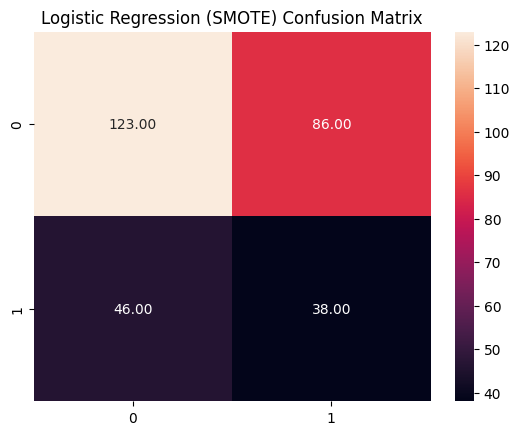

In [118]:
# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_sm), annot = True, fmt = "0.2f")
plt.title("Logistic Regression (SMOTE) Confusion Matrix")
plt.show()

## 2. Decision Tree

In [106]:
# instantiating the Decision Tree model

results_tree = pd.DataFrame(columns = ["Accuracy", "Precision", "Recall", "F1"])

tree = DecisionTreeClassifier()
tree.fit(X_train_scaled, y_train)
y_pred_tree = tree.predict(X_test_scaled)
Accuracy_tree = accuracy_score(y_test, y_pred_tree)
Precision_tree = precision_score(y_test, y_pred_tree)
Recall_tree = recall_score(y_test, y_pred_tree)
F1_tree = f1_score(y_test, y_pred_tree)

# appending the results table
results_tree.loc[len(results_tree)] = [Accuracy_tree, Precision_tree, Recall_tree, F1_tree]

results_tree

,Accuracy,Precision,Recall,F1
0,0.600683,0.296296,0.285714,0.290909


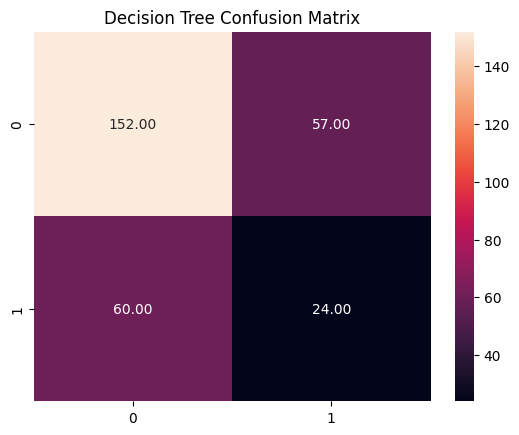

In [107]:
# confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot = True, fmt = "0.2f")
plt.title("Decision Tree Confusion Matrix")
plt.show()

## 3. LightGBM Model

- LightGBM (Light Gradient Boosting Machine) is a boosting algorithm. Specifically, it's a gradient boosting framework that builds an ensemble of decision trees in a smart, fast and accurate way.
- LightGBM builds many trees, each fixing mistakes of the last. it works in a sequential manner.
- The model doesn't need label encoding it can work well with categorical features, this is one big advantage over decision trees and logistic regression.

In [59]:
# When classifying with lightGBM we don't need to do much preprocessing like label encoding

mtn.head() # we use the original data

,Customer ID,Full Name,Date of Purchase,Age,State,MTN Device,Gender,Satisfaction Rate,Customer Review,Customer Tenure in months,Subscription Plan,Unit Price,Number of Times Purchased,Total Revenue,Data Usage,Customer Churn Status,Reasons for Churn
0,CUST0001,Ngozi Berry,Jan-25,27,Kwara,4G Router,Male,2,Fair,2,165GB Monthly Plan,35000,19,665000,44.48,Yes,Relocation
1,CUST0002,Zainab Baker,Mar-25,16,Abuja (FCT),Mobile SIM Card,Female,2,Fair,22,12.5GB Monthly Plan,5500,12,66000,19.79,Yes,Better Offers from Competitors
2,CUST0003,Saidu Evans,Mar-25,21,Sokoto,5G Broadband Router,Male,1,Poor,60,150GB FUP Monthly Unlimited,20000,8,160000,9.64,No,NaN
3,CUST0003,Saidu Evans,Mar-25,21,Sokoto,Mobile SIM Card,Male,1,Poor,60,1GB+1.5mins Daily Plan,500,8,4000,197.05,No,NaN
4,CUST0003,Saidu Evans,Mar-25,21,Sokoto,Broadband MiFi,Male,1,Poor,60,30GB Monthly Broadband Plan,9000,15,135000,76.34,No,NaN


In [84]:
# Preprocessing, dropping customer ID, full name, date of purchase columns and label encoding the target column

mtn_dt = mtn.copy() # creating a copy of the dataset
target_classes = {"Yes":1, "No": 0}
mtn_dt["Churn"] = mtn_dt["Customer Churn Status"].map(target_classes)
mtn_dt = mtn_dt.drop(columns = ["Customer ID", "Full Name", "Date of Purchase", "Reasons for Churn", "Customer Churn Status"])
mtn_dt.head()

,Age,State,MTN Device,Gender,Satisfaction Rate,Customer Review,Customer Tenure in months,Subscription Plan,Unit Price,Number of Times Purchased,Total Revenue,Data Usage,Churn
0,27,Kwara,4G Router,Male,2,Fair,2,165GB Monthly Plan,35000,19,665000,44.48,1
1,16,Abuja (FCT),Mobile SIM Card,Female,2,Fair,22,12.5GB Monthly Plan,5500,12,66000,19.79,1
2,21,Sokoto,5G Broadband Router,Male,1,Poor,60,150GB FUP Monthly Unlimited,20000,8,160000,9.64,0
3,21,Sokoto,Mobile SIM Card,Male,1,Poor,60,1GB+1.5mins Daily Plan,500,8,4000,197.05,0
4,21,Sokoto,Broadband MiFi,Male,1,Poor,60,30GB Monthly Broadband Plan,9000,15,135000,76.34,0


In [86]:
# Splitting the data into train and test set

X = mtn_dt.drop(columns = "Churn")
y = mtn_dt["Churn"]

In [95]:
# replacing the " " with "_"
X.columns = X.columns.str.replace(" ", "_")
X.head()

,Age,State,MTN_Device,Gender,Satisfaction_Rate,Customer_Review,Customer_Tenure_in_months,Subscription_Plan,Unit_Price,Number_of_Times_Purchased,Total_Revenue,Data_Usage
0,27,Kwara,4G Router,Male,2,Fair,2,165GB Monthly Plan,35000,19,665000,44.48
1,16,Abuja (FCT),Mobile SIM Card,Female,2,Fair,22,12.5GB Monthly Plan,5500,12,66000,19.79
2,21,Sokoto,5G Broadband Router,Male,1,Poor,60,150GB FUP Monthly Unlimited,20000,8,160000,9.64
3,21,Sokoto,Mobile SIM Card,Male,1,Poor,60,1GB+1.5mins Daily Plan,500,8,4000,197.05
4,21,Sokoto,Broadband MiFi,Male,1,Poor,60,30GB Monthly Broadband Plan,9000,15,135000,76.34


In [96]:
# Converting object type columns to category type

for col in X.select_dtypes(include = 'O').columns:
    X[col] = X[col].astype('category')


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [97]:
import lightgbm as lgb

results_lg = pd.DataFrame(columns = ["Accuracy", "Precision", "Recall", "F1"])

lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train, categorical_feature = "auto")
y_pred_lg = lgb_model.predict(X_test)
Accuracy_lg = accuracy_score(y_test, y_pred_lg)
Precision_lg = precision_score(y_test, y_pred_lg)
Recall_lg = recall_score(y_test, y_pred_lg)
F1_lg = f1_score(y_test, y_pred_lg)

results_lg.loc[len(results_lg)] = [Accuracy_lg, Precision_lg, Recall_lg, F1_lg]

[LightGBM] [Info] Number of positive: 200, number of negative: 481
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606
[LightGBM] [Info] Number of data points in the train set: 681, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.293686 -> initscore=-0.877550
[LightGBM] [Info] Start training from score -0.877550
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [98]:
results_lg

,Accuracy,Precision,Recall,F1
0,0.791809,0.744681,0.416667,0.534351


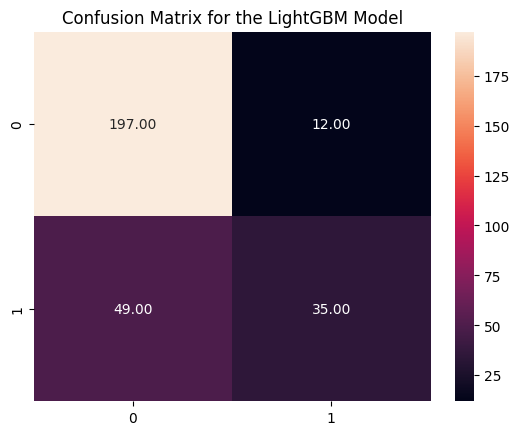

In [104]:
# Confusion matrix
confusion_matrix_lgb = confusion_matrix(y_test, y_pred_lg)

# Confusion Matrix Plot
sns.heatmap(confusion_matrix_lgb, annot = True, fmt = "0.2f")
plt.title("Confusion Matrix for the LightGBM Model")
plt.show()

# **Conclusion**

In [130]:
all_results = pd.DataFrame(columns = ["Accuracy", "Precision", "Recall", "F1"])

all_results = pd.concat([results, results_sm, results_lg, results_tree], axis = 0, ignore_index = False, keys = ["Logistic", "Logistic (SMOTE)", "LightGBM", "Decision Tree"])
all_results = all_results.reset_index(level = 0)
all_results.columns = all_results.columns.str.replace("level_0", "Model")
all_results.set_index("Model")

,Accuracy,Precision,Recall,F1
Model,,,,
Logistic,0.662116,0.294118,0.117647,0.168067
Logistic (SMOTE),0.549488,0.306452,0.452381,0.365385
LightGBM,0.791809,0.744681,0.416667,0.534351
Decision Tree,0.600683,0.296296,0.285714,0.290909


1. Logistic Regression (Baseline)

    - Low Recall (11.8%): Struggles to identify positive cases (high false negatives).

    - Low Precision (29.4%): Predicts many false positives when it does classify as "Yes."

2. SMOTE Improved Recall but Reduced Accuracy:

    - Recall increased from 11.8% → 45.2%, but accuracy dropped (66.2% → 54.9%).

    - Trade-off: Better at capturing positives but at the cost of overall correctness.

3. LightGBM (Best Overall Performance)

    - Highest Accuracy (79.2%) and Precision (74.5%): Most reliable for correct "Yes" predictions.

    - Moderate Recall (41.7%): Still misses ~58% of true positives, but better than other models.

    - Strong F1-Score (53.4%): Balances precision and recall better than alternatives.

4. Decision Tree (Weakest Model)

    - Poor Precision (29.6%) and Recall (28.6%): Prone to both false positives and negatives.

    - Overfitting Risk: Likely capturing noise rather than patterns.